In [1]:
import pandas as pd
import numpy as np2
import math
import matplotlib.pyplot as plt
import datetime 
import time
import random
#from refainedLibrary import Refained_Data
from refainedLibrary_v3 import *
from statsmodels.tsa.api import Holt
from scipy.interpolate import *
from matplotlib.backend_bases import MouseButton
from tqdm.notebook import tqdm

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
rd = Refained_Data('sCREEN-dataset.txt')
data = rd.get_dataset()

In [4]:
#0x00205EFB1721 
#0x00205EFB1243    
#0x00205F151116
sub_data = data.loc[data['tag_id'] == "0x00205EFE0F84"]
len(sub_data)

51

### Number of point for tag

In [18]:
for i in range(len(n)):
    print(f"{i} - {n[i]} - {tag_df.keys()[i]}")


0 - 62310.0 - 0x00205EFB161F
1 - 52558.0 - 0x00205F151090
2 - 51341.0 - 0x00205EFE0F24
3 - 43927.0 - 0x00205F151077
4 - 43564.0 - 0x00205F151091
5 - 41434.0 - 0x00205F151116
6 - 40618.0 - 0x00205F150CC6
7 - 40188.0 - 0x00205F151021
8 - 39327.0 - 0x00205EFB1321
9 - 38652.0 - 0x00205F15105B
10 - 38649.0 - 0x00205F0907BC
11 - 38548.0 - 0x00205F1510B5
12 - 37955.0 - 0x00205F151107
13 - 37578.0 - 0x00205F09087F
14 - 37228.0 - 0x00205F090123
15 - 36906.0 - 0x00205F1510FD
16 - 36816.0 - 0x00205F1510AA
17 - 35448.0 - 0x00205F151015
18 - 35369.0 - 0x00205F1510E8
19 - 35034.0 - 0x00205F090588
20 - 34549.0 - 0x00205F1510A9
21 - 33967.0 - 0x00205F15107E
22 - 32996.0 - 0x00205EFB0FD4
23 - 31970.0 - 0x00205F151064
24 - 31448.0 - 0x00205F150CD4
25 - 31205.0 - 0x00205F1510ED
26 - 30445.0 - 0x00205EFB12AC
27 - 29956.0 - 0x00205EFB1544
28 - 29338.0 - 0x00205F15105E
29 - 29037.0 - 0x00205F1510DB
30 - 28659.0 - 0x00205F1510AC
31 - 28643.0 - 0x00205F1510AB
32 - 27316.0 - 0x00205F1510EF
33 - 26911.0 - 0x002

In [20]:
#rimuove i carelli con solo 1 punto
print(len(data))
for i in range(134, len(n)):
    data = data.loc[data['tag_id'] != tag_df.keys()[i]]

print(len(data))

4622439
4622400


# Creazione Dataset primordiale

In [3]:
name_file = "trajectories_2.csv"

file1 = open(name_file, "a") 
file1.write("id,tag_id,time,x,y,n_traj\n")
file1.close()

tag_df = data.groupby('tag_id')["x"].count()
valid_tag = []
for i, t in enumerate(tag_df.keys()):
    if tag_df.iloc[i] > 100:
        valid_tag.append(t)

num = 0
start_time = time.time()
for i, tag in enumerate(valid_tag):
    t1_time = time.time()
    sub_data = data.loc[data['tag_id'] == tag]
    sub_data = sub_data.sort_values('time')
    trajectories = rd.find_trajectory(sub_data, 1, 150, 1, 300)
    print(f"{(time.time() - t1_time)} seconds, tag: {tag}")
    for j, traj in enumerate(trajectories):
        traj["n_traj"] = num
        traj.to_csv(name_file, mode="a", header=False, index=True)
        num+=1

print(f"TOTAL TIME: {(time.time() - start_time)/60} minutes")


3.656407594680786 seconds, tag: 0x00205EA90CD2
1.1885647773742676 seconds, tag: 0x00205EFB0E82
0.6507611274719238 seconds, tag: 0x00205EFB0E8D
9.643592119216919 seconds, tag: 0x00205EFB0EE2
25.658108949661255 seconds, tag: 0x00205EFB0FD4
1.5691487789154053 seconds, tag: 0x00205EFB100F


MemoryError: Unable to allocate 12.9 GiB for an array with shape (1727397253,) and data type float64

In [156]:
trajectories = rd.read_trajectories('trajectories.csv')
for idx, traj in enumerate(trajectories):
    tag_id = traj.iloc[0]["tag_id"]
    n_traj = traj.iloc[0]["n_traj"]
    print(f"Number of point for {tag_id} : {len(traj)}")
    traj = traj.drop_duplicates('time')
    print(f"Number of unique points: {len(traj)}")
    traj_resapled = traj.set_index('time', ).resample('3S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    #traj_resapled["tag_id"] = tag_id
    #traj_resapled["n_traj"] = n_traj
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    traj_resapled.reset_index(inplace=True)
    #print(traj_resapled)
    #traj_resapled.to_csv("trajectories_resampled_2.csv", mode="a", header=False, index=False)
    break

Number of point for 0x00205EA90CD2 : 2712
Number of unique points: 789
Number of point for resampling trajectory: 796


In [92]:
idx+=1
idx

1

Start time: 2016-07-01 16:55:42
End time: 2016-07-01 17:00:42
Time delta: 0 days 00:05:00


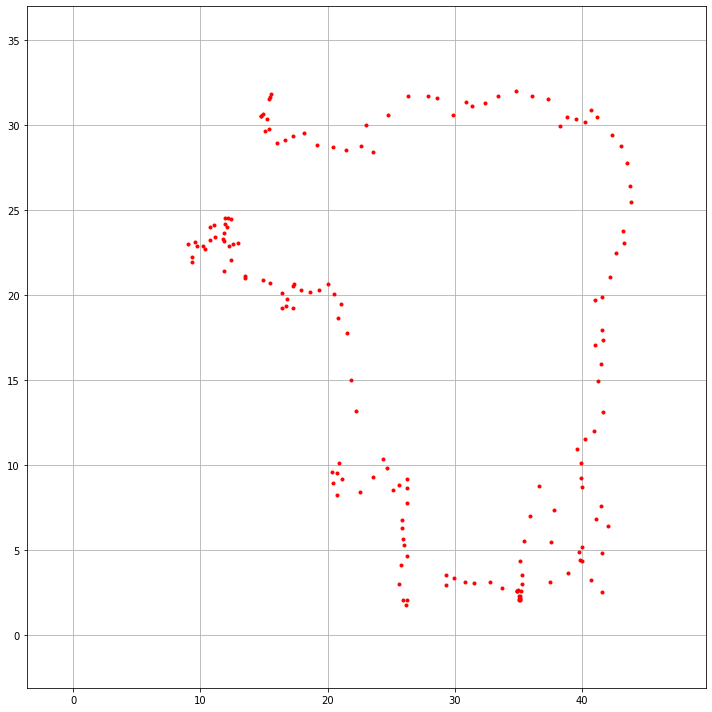

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

traj = trajectories[idx]
print("Start time:", traj['time'].min())
print("End time:", traj['time'].max())
print("Time delta:", traj['time'].max() - traj['time'].min())
y = traj['y'].values
x = traj['x'].values
ax.plot(x, y, f'.r')
plt.show()

# Interpolazione LINEARE

In [3]:
trajectories = rd.read_trajectories('trajectories_2.csv')

In [4]:
def inter_linear(traj):
    tag_id = traj.iloc[0]["tag_id"]
    n_traj = traj.iloc[0]["n_traj"]
    traj = traj.drop_duplicates('time')
    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    traj_resapled.reset_index(inplace=True)  
    return traj_resapled

#inter_linear(trajectories[5])

In [5]:
def inter_linear_2(traj):
    traj = traj.drop_duplicates('time')
    time_ts = traj['time'].apply(lambda x: x.value)

    fx = interp1d(time_ts, traj["x"],fill_value = "extrapolate" )
    fy = interp1d(time_ts, traj["y"],fill_value = "extrapolate" )

    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    traj_resapled.reset_index(inplace=True)

    for idx, row in traj_resapled.iterrows():
        row = traj_resapled.loc[idx]
        if math.isnan(row["x"]):
            timestamp = row["time"].value
            traj_resapled.at[idx, "x"] = fx(timestamp)

        if math.isnan(row["y"]):
            timestamp = row["time"].value
            traj_resapled.at[idx, "y"] = fy(timestamp)

    tag_id = traj.iloc[0]["tag_id"]
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 

#inter_linear_2(trajectories[5])

# Interpolazione GAUSSIANA

In [6]:
def inter_gaussian(traj):
    tag_id = traj.iloc[0]["tag_id"]
    n_traj = traj.iloc[0]["n_traj"]
    traj = traj.drop_duplicates('time')
    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    x_g = traj_resapled["x"].rolling(window=10, win_type='gaussian', center=True).mean(std=0.5)
    y_g = traj_resapled["y"].rolling(window=10, win_type='gaussian', center=True).mean(std=0.5)
    
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    traj_resapled.reset_index(inplace=True)  
    return traj_resapled 
   
    
#inter_gaussian(trajectories[5])

# Exponential Smoothing

In [7]:
def smoothing_exp(traj, alpha):
    traj = traj.drop_duplicates('time')
    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    traj_resapled.reset_index(inplace=True)
    
    for idx, row in traj_resapled.iterrows():
        if idx == 0:
            traj_resapled.at[idx, "x"] = row["x"]
            traj_resapled.at[idx, "y"] = row["y"]
        else:
            old_row = traj_resapled.iloc[idx-1]
            traj_resapled.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj_resapled.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]
    
    tag_id = traj.iloc[0]["tag_id"]
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 

#smoothing_exp(trajectories[5], 0.3)

In [8]:
def smoothing_inter_exp(traj, alpha):
    
    tag_id = traj["tag_id"].iloc[0]
    print(f"Number of point for {tag_id} : {len(traj)}")
    
    traj = traj.drop_duplicates('time')
    traj.reset_index(inplace=True, drop= True)

    for idx, row in traj.iterrows():
        if idx == 0:
            traj.at[idx, "x"] = row["x"]
            traj.at[idx, "y"] = row["y"]
        else:
            old_row = traj.iloc[idx-1]
            traj.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]

    traj_resapled = traj.set_index('time').resample('1S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')

    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 

#result = smoothing_inter_exp(trajectories[200], 0.4)

In [3]:
#DEPRECATED
# Da usare per resample < 1 sec

def smoothing_inter_exp(traj, alpha):
    
    tag_id = traj["tag_id"].iloc[0]
    print(f"Number of point for {tag_id} : {len(traj)}")
    
    #traj = traj.drop_duplicates('time')
    #traj.reset_index(inplace=True, drop= True)

    for idx, row in traj.iterrows():
        if idx == 0:
            traj.at[idx, "x"] = row["x"]
            traj.at[idx, "y"] = row["y"]
        else:
            old_row = traj.iloc[idx-1]
            traj.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]

    traj_resapled = traj.set_index('time').resample('0.4S', origin = "start").asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')

    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 


In [4]:
# Da usare per resample < 1 sec
def smoothing_double_exp(traj, alpha, alpha2):
    
    n_traj = traj["n_traj"].iloc[0]
    tag_id = traj["tag_id"].iloc[0]
    
    traj = traj.drop_duplicates('time')
    traj.reset_index(inplace=True, drop= True)

    for idx, row in traj.iterrows():
        if idx == 0:
            traj.at[idx, "x"] = row["x"]
            traj.at[idx, "y"] = row["y"]
        else:
            old_row = traj.iloc[idx-1]
            traj.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]
    
    traj.set_index('time', inplace = True)
    oidx = traj.index
    nidx = pd.date_range(oidx.min(), oidx.max(), freq='1s') # CAMBIARE FREQUENZA
    traj_resapled = traj.reindex(oidx.union(nidx))
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    traj_resapled = traj_resapled.reindex(nidx)
    traj_resapled["n_traj"] = n_traj
    traj_resapled["tag_id"] = tag_id
 
    traj_resapled.reset_index(inplace=True, drop= False)
    traj_resapled.rename(columns = {"index":"time"}, inplace = True)
    
    for idx, row in traj_resapled.iterrows():
        if idx == 0:
            traj_resapled.at[idx, "x"] = row["x"]
            traj_resapled.at[idx, "y"] = row["y"]
        else:
            old_row = traj_resapled.iloc[idx-1]
            traj_resapled.at[idx, "x"] = alpha2*row["x"] + (1-alpha2)*old_row["x"]
            traj_resapled.at[idx, "y"] = alpha2*row["y"] + (1-alpha2)*old_row["y"] 
    
    traj_resapled = traj_resapled[["id","tag_id","time","x","y","n_traj"]]

   
    return traj_resapled 


In [ ]:
    '''for i, n in enumerate(x1):
        if i%10 == 0:
            ax.annotate(i, (x1[i], y1[i]))'''

Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 417
Number of unique points: 368
Number of point for resampling trajectory: 2194


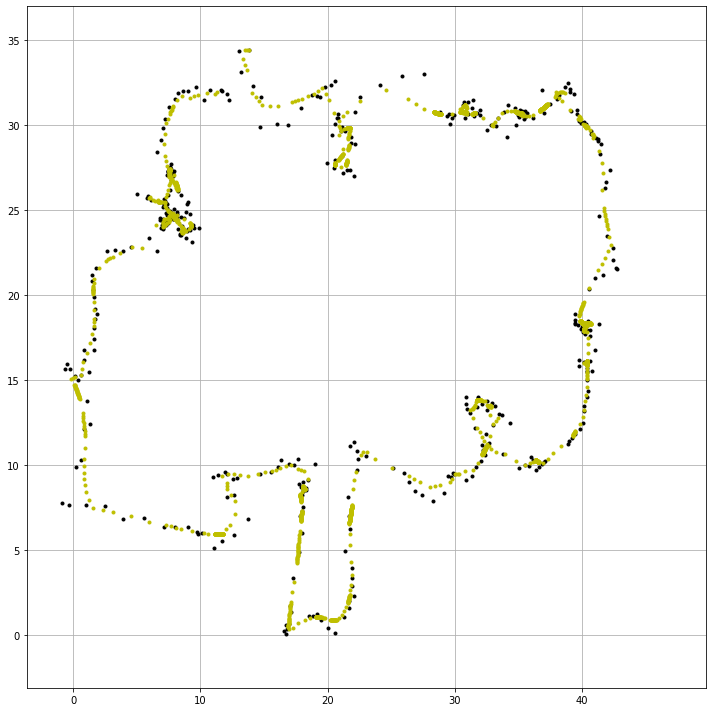

In [51]:
"""
- le due inter lineari sono uguali (sovraposizioni dei punti)
- la gaussiana è troppo dispersiva (manca andamento generale della traiettoria)
- con smoothing esponenziale dipende 
    ~ alpha grande: da più importanza al punto corrente 
    ~ alpha piccolo: crea un andamento generale
"""
path_image = "E:\\Università\\Magistrale\\TESI_MAG\\Tesi_magistrale\\img"

#4233 3878
traj = trajectories[4233]
d1 = inter_linear(traj)
d2 = inter_gaussian(traj)
d3 = smoothing_exp(traj, 0.4)
d4 = inter_linear_2(traj)
d5 = smoothing_inter_exp(traj, 0.4)


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

y = traj['y'].values
x = traj['x'].values
p, = ax.plot(x, y, f'.k')

#LINEARE 1
y1 = d1['y'].values
x1 = d1['x'].values
#p1, = ax.plot(x1, y1, f'.b')

#GAUSSIANA
y2 = d2['y'].values
x2 = d2['x'].values
#p2, = ax.plot(x2, y2, f'.g')

#LINEAR + SMOOTHING
y3 = d3['y'].values
x3 = d3['x'].values
#p3, = ax.plot(x3, y3, f'.r')

#LINEARE 2
y4 = d4['y'].values
x4 = d4['x'].values
#p4, = ax.plot(x4, y4, f'.y')

#SMOOTHING + LINEAR
y5 = d5['y'].values
x5 = d5['x'].values
p5, = ax.plot(x5, y5, f'.y')

plt.savefig(f"{path_image}\\traj-smooth2.png")

plt.show()

# Re-sampling + Interpolazione

In [4]:
trajectories = rd.read_trajectories("trajectories_2.csv")

In [23]:
# DEPRECATO
def add_decSeconds(trajectories):
    new_trajectories = []
    for idx, traj in enumerate(tqdm(trajectories)):
        new_time = []
        new_time.append(traj.iloc[0]["time"])

        for i in range(1, len(traj)):
            row = traj.iloc[i]
            previous = new_time[i - 1]

            if previous >= row["time"]:
                new_time.append(previous + datetime.timedelta(seconds=0.4))
            else:
                time_delta = (row["time"] - previous).total_seconds()
                rest = (time_delta * 10) % 4
                new_time.append(row["time"] + datetime.timedelta(seconds=rest / 10))

        traj["time"] = new_time
        new_trajectories.append(traj)
    return new_trajectories

In [26]:
# PER VEDERE DUPPLICATI NEL TEMPO
d= traj[traj.duplicated(subset = "time", keep=False)]
d

,id,tag_id,time,x,y,n_traj


In [5]:

name_file = "trajectories_2_resampled_1s.csv"
file1 = open(name_file, "a") 
file1.write("id,tag_id,time,x,y,n_traj\n")
file1.close()

for idx, traj in enumerate(tqdm(trajectories)):

    resampled_traj = smoothing_double_exp(traj, 0.4, 0.25)
    
    resampled_traj["x"] = resampled_traj["x"].round(3)
    resampled_traj["y"] = resampled_traj["y"].round(3)

    resampled_traj.to_csv(name_file, mode="a", header=False, index=False)
    
       

  0%|          | 0/4283 [00:00<?, ?it/s]

In [12]:
trajectories = rd.read_trajectories('trajectories_2_resampled_04s.csv')
len(trajectories)

4283

# Sviupppo metodi per creazione dataset per modelli 
#### Per versione corretta vedi notebook 04_create_dataset_4_model


In [9]:
#DEPRECATED
def get_data_4_model(PATH, n_start, n_trajectories):
    trajectories = rd.read_trajectories(PATH)
    trajectories.sort(key= lambda d: d["time"].iloc[0])
    result = pd.DataFrame()  
    
    if n_start + n_trajectories > len(trajectories):
        return result  
    print("Start")
    for i in range(n_start, n_start + n_trajectories):
        t = trajectories[i]
        print(i)
        
        #prende un sample ogni 5 => intervallo di 5 secondi
        # con => list(map(lambda x: x.set_index('time', ).resample('5S', origin="start").asfreq(),trajectories ))
        # si ottiene lo stesso risultato
        
        result = result.append(t.iloc[::5, :])
    result.sort_values(by = ["time"], inplace = True)   
    
    d = pd.DataFrame(columns = ["n_frame", "idx", "x", "y"])
    
    print("start while")
    st = trajectories[n_start].iloc[0]["time"]
    n_points = len(result)
    n_frame = 0
    while n_points > 0:
        print(n_points)
        end = st + datetime.timedelta(0,3)
        mask = (result['time']>= st) & (result['time'] <= end)
        time_frame = result.loc[mask]
        for idx, row in time_frame.iterrows():
            d = d.append(pd.DataFrame([[n_frame, int(row["n_traj"], base=16), row["x"], row["y"]]], columns = d.columns))
        n_frame += 1
        st = end
        n_points -= len(time_frame)
    
    return d.T


In [10]:
PATH = 'trajectories_resampled.csv'
df = get_data_4_model(PATH, 250, 50)
print(df)
df.to_csv("screen.csv", mode="a", header=False, index=False)

Start
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
start while
16696
16695
16694
16694
16693
16692
16691
16690
16690
16689
16688
16687
16686
16686
16685
16684
16683
16682
16682
16681
16680
16679
16678
16678
16677
16676
16675
16674
16674
16673
16672
16671
16670
16670
16669
16668
16667
16666
16666
16665
16664
16663
16662
16662
16661
16660
16659
16658
16658
16657
16656
16655
16654
16654
16653
16652
16651
16650
16650
16649
16648
16647
16646
16646
16645
16644
16643
16642
16642
16641
16640
16639
16638
16638
16637
16636
16635
16634
16634
16633
16632
16631
16630
16630
16629
16628
16627
16626
16626
16625
16624
16623
16622
16622
16621
16620
16619
16618
16618
16617
16616
16615
16614
16614
16613
16612
16611
16610
16610
16609
16608
16607
16605
16604
16602
16601
16599
16597
16596
16594
16593
16591
16589
16588
16586
16585
16583
16581
16580
16578
16

15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15972
15971
15970
15969
15969
15968
15967
15966
15965
15965
15964
15963
15962
15961
15961
15960
15959
15958
15957
15957
15956
15955
15954
15953
15953
1595

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
1531

15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15314
15313
15312
15311
15310
15310
15309
15308
15307
15306
15306
15305
15304
15303
15302
15302
15301
15300
15299
15298
15298
15297
15296
15295
15294
15294
15293
15292
15291
15290
15290
15289
15288
15287
15286
15286
15285
15284
15283
15282
15282
15281
15280
15279
15278
15278
15277
15276
15275
15274
15274
15273
15272
15271
15270
15270
15269
15268
15267
15266
15266
15265
15264
15263
15262
15262
15261
15260
15259
15258
15258
15257
15256
15255
15254
15254
15253
15252
15251
15250
15250
15249
15248
15247
15246
15246
15245
15244
15243
15242
15242
15241
15240
15239
15238
15238
15237
15236
15235
15234
15234
15233
15232
15231
15230
15230
15229
15228
15227
15226
15226
15225
15224
15223
15222
15222
15221
15220
15219
15218
15218
15217
15216
15215
15214
15214
15213
15212
15211
15210
15210
15209
1520

14085
14085
14084
14083
14082
14081
14081
14080
14079
14078
14077
14077
14076
14075
14074
14073
14073
14072
14071
14070
14069
14069
14068
14067
14066
14065
14065
14064
14063
14062
14061
14061
14060
14059
14058
14057
14057
14056
14055
14054
14053
14053
14052
14051
14050
14049
14049
14048
14047
14046
14045
14045
14044
14043
14042
14041
14041
14040
14039
14038
14037
14037
14036
14035
14034
14033
14033
14032
14031
14030
14029
14029
14028
14027
14026
14025
14025
14024
14023
14021
14019
14018
14016
14015
14013
14011
14010
14008
14007
14005
14003
14002
14000
13999
13997
13995
13994
13992
13991
13989
13987
13986
13984
13983
13981
13979
13978
13976
13975
13973
13971
13970
13968
13967
13965
13963
13962
13960
13959
13957
13955
13954
13952
13951
13949
13947
13946
13944
13943
13941
13939
13938
13936
13935
13933
13931
13930
13928
13927
13925
13923
13922
13920
13919
13917
13915
13914
13912
13911
13909
13907
13906
13904
13903
13901
13899
13898
13896
13895
13893
13891
13890
13888
13887
13885
13883
1388

12354
12352
12350
12348
12346
12346
12344
12342
12340
12338
12338
12336
12334
12332
12330
12330
12328
12326
12324
12322
12322
12320
12318
12316
12314
12314
12312
12310
12308
12306
12306
12304
12302
12300
12298
12298
12296
12294
12292
12290
12290
12288
12286
12284
12282
12282
12280
12278
12276
12274
12274
12271
12268
12265
12263
12262
12259
12257
12255
12254
12253
12251
12249
12247
12246
12245
12243
12241
12239
12237
12235
12232
12230
12227
12225
12223
12220
12218
12215
12213
12211
12208
12206
12203
12201
12199
12196
12194
12191
12189
12187
12184
12182
12179
12177
12175
12172
12170
12167
12165
12163
12160
12158
12155
12153
12151
12148
12146
12143
12141
12139
12136
12134
12131
12129
12127
12124
12122
12119
12117
12115
12112
12110
12107
12105
12103
12100
12098
12095
12093
12091
12088
12086
12083
12081
12079
12076
12074
12071
12069
12067
12064
12062
12059
12057
12055
12052
12050
12047
12045
12043
12040
12038
12035
12033
12031
12028
12026
12023
12020
12017
12013
12011
12007
12004
12001
1199

10206
10206
10205
10204
10203
10202
10202
10201
10200
10199
10198
10198
10197
10196
10195
10194
10194
10193
10192
10191
10190
10190
10189
10188
10187
10186
10186
10185
10184
10183
10182
10182
10181
10180
10179
10178
10178
10177
10176
10175
10174
10174
10173
10172
10171
10170
10170
10169
10168
10167
10166
10166
10165
10164
10163
10162
10162
10161
10160
10159
10158
10158
10157
10156
10155
10154
10154
10153
10152
10151
10150
10150
10149
10148
10147
10146
10146
10145
10144
10143
10142
10142
10141
10140
10139
10138
10138
10137
10136
10135
10134
10134
10133
10132
10131
10130
10130
10129
10128
10127
10126
10126
10125
10124
10123
10122
10122
10121
10120
10119
10118
10118
10117
10116
10115
10114
10114
10113
10112
10111
10110
10110
10109
10108
10107
10106
10106
10105
10104
10103
10102
10102
10101
10100
10099
10098
10098
10097
10096
10095
10094
10094
10093
10092
10091
10090
10090
10089
10088
10087
10086
10086
10085
10084
10083
10082
10082
10081
10080
10079
10078
10078
10077
10076
10075
10074
1007

8410
8408
8407
8405
8404
8402
8400
8399
8397
8396
8394
8392
8391
8389
8388
8386
8384
8383
8381
8380
8378
8376
8375
8373
8372
8370
8368
8367
8365
8364
8362
8360
8359
8357
8356
8354
8352
8351
8349
8348
8346
8344
8343
8341
8340
8338
8336
8335
8333
8332
8330
8328
8327
8325
8324
8322
8320
8319
8317
8316
8314
8312
8311
8309
8308
8306
8304
8303
8301
8300
8298
8296
8295
8293
8292
8290
8288
8287
8285
8284
8282
8280
8279
8277
8276
8274
8272
8271
8269
8268
8266
8264
8263
8261
8260
8258
8256
8255
8253
8252
8250
8248
8247
8245
8244
8242
8240
8239
8237
8236
8234
8232
8231
8229
8228
8226
8224
8223
8221
8220
8218
8216
8215
8213
8212
8210
8208
8207
8205
8204
8202
8200
8199
8197
8196
8194
8192
8191
8189
8188
8186
8184
8183
8181
8180
8178
8176
8175
8172
8171
8168
8165
8163
8160
8159
8156
8153
8151
8148
8147
8144
8141
8139
8136
8135
8132
8129
8127
8124
8123
8120
8117
8115
8112
8111
8108
8105
8103
8100
8099
8096
8093
8091
8088
8087
8084
8081
8079
8076
8075
8072
8069
8067
8064
8063
8060
8058
8057
8055
8054


5377
5376
5375
5374
5373
5373
5372
5371
5370
5369
5369
5368
5367
5366
5365
5365
5364
5363
5362
5361
5361
5360
5359
5358
5357
5357
5356
5355
5354
5353
5353
5352
5351
5350
5349
5349
5348
5347
5346
5345
5345
5344
5343
5342
5341
5341
5340
5339
5338
5337
5337
5336
5335
5334
5333
5333
5332
5331
5330
5329
5329
5328
5327
5326
5325
5325
5324
5323
5322
5321
5321
5320
5319
5318
5317
5317
5316
5315
5314
5313
5313
5312
5311
5310
5309
5309
5307
5306
5304
5302
5301
5299
5298
5296
5294
5293
5291
5290
5288
5286
5285
5283
5282
5280
5278
5277
5275
5274
5272
5270
5269
5267
5266
5264
5262
5261
5259
5258
5256
5254
5253
5251
5250
5248
5246
5245
5243
5242
5240
5238
5237
5235
5234
5232
5230
5229
5227
5226
5224
5222
5221
5219
5218
5216
5214
5213
5211
5210
5208
5206
5205
5203
5202
5200
5198
5197
5195
5194
5192
5190
5189
5187
5186
5184
5182
5181
5179
5178
5176
5174
5173
5171
5170
5168
5166
5165
5163
5162
5160
5158
5157
5155
5154
5152
5150
5149
5147
5146
5144
5142
5141
5139
5138
5136
5134
5133
5131
5130
5128
5126


2819
2817
2814
2812
2810
2807
2805
2802
2799
2796
2792
2790
2786
2783
2780
2776
2774
2770
2767
2764
2760
2758
2755
2753
2751
2748
2746
2743
2741
2739
2736
2734
2731
2729
2727
2724
2722
2719
2717
2715
2712
2710
2707
2705
2703
2700
2698
2695
2693
2691
2688
2686
2683
2681
2679
2676
2674
2671
2669
2667
2664
2662
2659
2657
2655
2652
2650
2647
2645
2643
2640
2638
2635
2633
2631
2628
2626
2623
2621
2619
2616
2614
2611
2609
2607
2604
2602
2599
2597
2595
2592
2590
2587
2585
2583
2580
2578
2575
2573
2571
2568
2566
2563
2561
2559
2556
2554
2551
2549
2547
2544
2542
2539
2537
2535
2532
2530
2527
2525
2523
2520
2518
2515
2513
2511
2508
2506
2503
2501
2499
2496
2493
2489
2486
2483
2480
2477
2473
2470
2467
2464
2461
2457
2454
2451
2448
2445
2441
2438
2435
2432
2429
2425
2422
2419
2416
2413
2409
2406
2403
2400
2397
2393
2390
2387
2384
2381
2377
2374
2371
2368
2365
2361
2358
2355
2352
2349
2345
2342
2339
2336
2333
2329
2326
2323
2320
2317
2313
2310
2307
2304
2301
2297
2294
2291
2288
2285
2281
2278
2275


## Dataset per modello

### Per versione definitiva vedi notebook 04_create_dataset_4_model

In [13]:

#DEPRECATED => CI METTE TROPPO
#PRIVATE METHOD
def get_data_in_format(data):
    st = data.iloc[0]["time"]
    n_points = len(data)
    return_df = pd.DataFrame(columns = ["n_frame", "n_traj", "x", "y"])
    n_frame = 0
    
    pbar = tqdm(total=n_points)
    
    while n_points > 0:
        #print(n_points)
        end = st + datetime.timedelta(0,5)
        mask = (data['time']>= st) & (data['time'] < end)
        time_frame = data.loc[mask]
        
        if len(time_frame) > 0:                                
            time_frame.drop(["id", "tag_id", "time"], axis = 1, inplace = True)
            time_frame["n_frame"] = n_frame
            return_df = return_df.append(time_frame)                    
            n_frame += 1
            
        #n_frame += 1    
        st = end
        n_points -= len(time_frame)
        pbar.update(len(time_frame))
        #break
        
    pbar.close()
    return return_df.T
    

def get_data_4_model(PATH, thrs):
    trajectories = rd.read_trajectories(PATH)
    
    
    resampled_traj = list(map(lambda x: x.iloc[::5], trajectories))
    all_trajectories = pd.concat(resampled_traj)
    
    
    max_n = 100
    #max_n = all_trajectories["n_traj"].max()
    n_4_train = random.sample(range(0,max_n+1), int(max_n*thrs))
    print(n_4_train)
    
    n_4_test = [x for x in range(max_n) if x not in n_4_train]
    print(n_4_test)
    
    
    train = all_trajectories[all_trajectories["n_traj"].isin(n_4_train)]
    train = train.sort_values('time').reset_index(drop=True)
    test = all_trajectories[all_trajectories["n_traj"].isin(n_4_test)]
    test = test.sort_values('time').reset_index(drop=True)
    
    train_data = get_data_in_format(train)
    test_data = get_data_in_format(test)
    
    return train_data, test_data
    
PATH = 'trajectories_resampled.csv'
train, test = get_data_4_model(PATH, 0.8)
print(train)
print(test)

[70, 17, 29, 60, 30, 1, 13, 50, 63, 24, 76, 18, 61, 94, 97, 36, 26, 87, 55, 93, 49, 35, 32, 89, 68, 79, 72, 82, 91, 77, 54, 66, 38, 83, 65, 40, 3, 0, 42, 37, 14, 2, 43, 48, 74, 33, 51, 85, 62, 46, 52, 5, 75, 98, 71, 57, 78, 20, 41, 25, 23, 56, 84, 6, 39, 64, 7, 12, 96, 27, 95, 22, 90, 4, 15, 53, 92, 99, 100, 16]
[8, 9, 10, 11, 19, 21, 28, 31, 34, 44, 45, 47, 58, 59, 67, 69, 73, 80, 81, 86, 88]


  0%|          | 0/63375 [00:00<?, ?it/s]

c:\users\aless\env_tesi_python\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-13-b5fadb3c3cd4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_frame["n_frame"] = n_frame


  0%|          | 0/16634 [00:00<?, ?it/s]

         0          1          2          3          4          5      \
n_frame      0          1          2          3          4          5   
n_traj      29         29         29         29         29         29   
x        19.58  19.238976  20.564123  24.024891  25.899372  26.060725   
y        38.47  38.845168  37.090078  36.439777  36.081587  35.936365   

             6          7          8          9      ...      63365  \
n_frame          6          7          8          9  ...      62458   
n_traj          29         29         29         29  ...        100   
x        26.950313  28.930361  29.587158  29.615727  ...  38.666454   
y        35.413723  36.092883  35.806673  35.743761  ...  11.655698   

             63366      63367      63368      63369      63370      63371  \
n_frame      62459      62460      62461      62462      62463      62464   
n_traj         100        100        100        100        100        100   
x        38.510735  36.925429  34.765653  31.24

In [3]:
def get_data_in_format(data):
    return_df = pd.DataFrame(columns = ["n_frame", "n_traj", "x", "y"])
    end = st = 0
    n_frame = 0
    
    for i in tqdm(range(len(data))):
        delta_time = data.iloc[i]["time"] - data.iloc[st]["time"]
        
        if delta_time.seconds <= 4:
            end = i
        else:
            time_frame = data.iloc[st:end + 1]                                  
            time_frame.drop(["id", "tag_id", "time"], axis = 1, inplace = True)
            time_frame["n_frame"] = n_frame
            return_df = return_df.append(time_frame)                    
            n_frame += 1            
            end = st = i
        
        if i == len(data)-1:
            time_frame = data.iloc[st:end + 1]                                  
            time_frame.drop(["id", "tag_id", "time"], axis = 1, inplace = True)
            time_frame["n_frame"] = n_frame
            return_df = return_df.append(time_frame)      
        """
        if len(time_frame) > 1:
            print(time_frame)    
        """
    
    return return_df.T
    

def get_data_4_model(PATH, thrs):
    trajectories = rd.read_trajectories(PATH)
        
    resampled_traj = list(map(lambda x: x.iloc[::5], trajectories))
    all_trajectories = pd.concat(resampled_traj)
    
    max_n = 1000
    #max_n = all_trajectories["n_traj"].max()
    n_4_train = random.sample(range(0,max_n+1), int(max_n*thrs))
    #n_4_train = [70, 17, 29, 60, 30, 1, 13, 50, 63, 24, 76, 18, 61, 94, 97, 36, 26, 87, 55, 93, 49, 35, 32, 89, 68, 79, 72, 82, 91, 77, 54, 66, 38, 83, 65, 40, 3, 0, 42, 37, 14, 2, 43, 48, 74, 33, 51, 85, 62, 46, 52, 5, 75, 98, 71, 57, 78, 20, 41, 25, 23, 56, 84, 6, 39, 64, 7, 12, 96, 27, 95, 22, 90, 4, 15, 53, 92, 99, 100, 16]
    n_4_test = [x for x in range(max_n) if x not in n_4_train]
    #n_4_test = [8, 9, 10, 11, 19, 21, 28, 31, 34, 44, 45, 47, 58, 59, 67, 69, 73, 80, 81, 86, 88]
   

    train = all_trajectories[all_trajectories["n_traj"].isin(n_4_train)]
    train = train.sort_values('time').reset_index(drop=True)
    test = all_trajectories[all_trajectories["n_traj"].isin(n_4_test)]
    test = test.sort_values('time').reset_index(drop=True)
    
    train_data = get_data_in_format(train)
    test_data = get_data_in_format(test)
    
    return train_data, test_data
    
PATH = 'trajectories_resampled.csv'
train, test = get_data_4_model(PATH, 0.8)

  0%|          | 0/522833 [00:00<?, ?it/s]

c:\users\aless\env_tesi_python\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-3-bb60c09b8868>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_frame["n_frame"] = n_frame
<ipython-input-3-bb60c09b8868>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

  0%|          | 0/82891 [00:00<?, ?it/s]

In [4]:
train.to_csv("screen_3.csv", mode="a", header=False, index=False)
test.to_csv("screen_3_test.csv", mode="a", header=False, index=False)

#senza buchi tra frame

# To see screen.csv file

In [5]:
train = pd.read_csv("screen_3.csv", header=None)
test = pd.read_csv("screen_3_test.csv", header=None)

In [6]:
train

,0,1,2,3,4,5,6,7,8,9,...,522823,522824,522825,522826,522827,522828,522829,522830,522831,522832
0,0.00,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,304102.000000,304103.000000,304104.000000,304105.000000,304106.000000,304107.000000,304108.000000,304109.000000,304110.000000,304111.000000
1,390.00,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
2,14.98,15.135808,17.240535,20.565380,21.871466,22.023943,22.176420,22.328897,22.592095,22.895090,...,12.872000,12.929073,12.890968,12.904140,12.917312,12.995329,11.817604,11.753112,11.892911,14.329673
3,35.17,35.426000,33.127056,32.048596,31.222955,31.116328,31.009701,30.903075,30.719403,30.500385,...,27.393545,27.528479,30.521195,30.769329,31.017463,31.678018,31.987450,32.028248,32.156532,32.776063


In [8]:
t = train.iloc[1]
print(t.unique())
print(len(t.unique()))

[ 390.  391.  392.  393.  394.  210.  211.  212.  395.  396.  214.   28.
  215.   29.   31.   32.  573.  150.  782.  574.  719.  247.  720.  706.
  399.  248.  400.  707.  722.  853.  403.  575.  723.  404.  405.  724.
  725.  726.  576.  727.  577.  578.  579.  218.  249.  580.  730.  250.
  708.  406.  407.  151.  731.  581.  408.  709.  409.  251.  710.  252.
  410.   33.  732.  583.  861.  711.   34.  584.  253.  784.  308.  220.
  309.  412.  785.  221.  413.    5.  712.    6.  310.  415.  713.  786.
    7.  862.  733.  222.    8.  416.  734.    9.  417.  254.  855.  735.
  312.  255.  418.  256.  419.  257.  420.  737.  738.  788.  258.  789.
   35.  739.   36.  740.   37.  259.  791.   39.  260.  261.   40.  792.
  856.  793.  715.  262.  716.  263.  794.  265.  266.  717.  795.   41.
   10.  267.   11.   43.  796.   13.  863.  718.   44.  857.   45.   46.
  270.   47.  271.  272.  273.  275.  276.  277.  278.  864.  421.   49.
  422.  279.  152.  423.   14.  424.  280.  154.  7